<a href="https://colab.research.google.com/github/SithuniNudara/Classifications_Model/blob/Master/classifcations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
dat = pd.read_csv('/content/diabetes.csv')

In [ ]:
dat.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
dat.shape

(768, 9)

In [ ]:
dat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
x=dat.iloc[:,0:8]
y=dat.iloc[:,8]

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.8,random_state=5)

In [ ]:
modellogistic = LogisticRegression(max_iter=1000)
modelKNN = KNeighborsClassifier(n_neighbors=7,metric='manhattan')
modelsvm = SVC(kernel='rbf')
modeltree = DecisionTreeClassifier(max_depth=10,criterion="gini")
modelrandomforest = RandomForestClassifier(n_estimators=500,criterion="gini")

In [ ]:
modellogistic.fit(xtrain,ytrain)
modelKNN.fit(xtrain,ytrain)
modelsvm.fit(xtrain,ytrain)
modeltree.fit(xtrain,ytrain)
modelrandomforest.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=500)

[Text(0.7217741935483871, 0.95, 'Glucose <= 155.0\ngini = 0.464\nsamples = 153\nvalue = [97.0, 56.0]\nclass = 0'),
 Text(0.5080645161290323, 0.85, 'Pregnancies <= 5.5\ngini = 0.375\nsamples = 124\nvalue = [93, 31]\nclass = 0'),
 Text(0.6149193548387097, 0.8999999999999999, 'True  '),
 Text(0.3387096774193548, 0.75, 'SkinThickness <= 39.0\ngini = 0.268\nsamples = 94\nvalue = [79, 15]\nclass = 0'),
 Text(0.1935483870967742, 0.65, 'BMI <= 31.1\ngini = 0.203\nsamples = 87\nvalue = [77, 10]\nclass = 0'),
 Text(0.06451612903225806, 0.55, 'Glucose <= 127.0\ngini = 0.071\nsamples = 54\nvalue = [52, 2]\nclass = 0'),
 Text(0.03225806451612903, 0.45, 'gini = 0.0\nsamples = 43\nvalue = [43, 0]\nclass = 0'),
 Text(0.0967741935483871, 0.45, 'DiabetesPedigreeFunction <= 1.11\ngini = 0.298\nsamples = 11\nvalue = [9, 2]\nclass = 0'),
 Text(0.06451612903225806, 0.35, 'Age <= 32.5\ngini = 0.18\nsamples = 10\nvalue = [9, 1]\nclass = 0'),
 Text(0.03225806451612903, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [

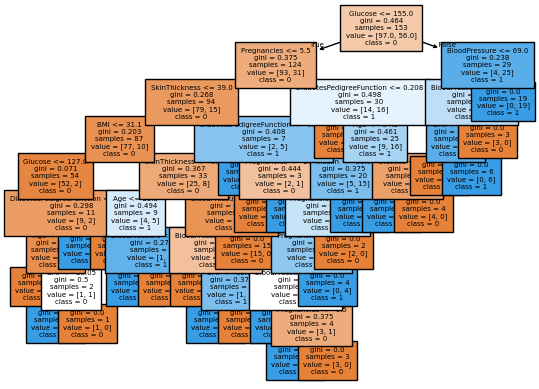

In [ ]:
plot_tree(modeltree, feature_names = dat.columns.tolist(), class_names=['0','1'],filled=True,fontsize=5)

In [ ]:
# do predictions
ypredlogistic = modellogistic.predict(xtest)
ypredknn = modelKNN.predict(xtest)
ypredsvm = modelsvm.predict(xtest)
ypredtree = modeltree.predict(xtest)
ypredrandom = modelrandomforest.predict(xtest)

In [ ]:
# confusion metric for each models
print("logistics", confusion_matrix(ytest,ypredlogistic))
print("KNN", confusion_matrix(ytest,ypredknn))
print("SVM", confusion_matrix(ytest,ypredsvm))
print("Decision Tree", confusion_matrix(ytest,ypredtree))
print("Random Forest", confusion_matrix(ytest,ypredrandom))

logistics [[343  60]
 [ 79 133]]
KNN [[336  67]
 [100 112]]
SVM [[376  27]
 [135  77]]
Decision Tree [[278 125]
 [ 96 116]]
Random Forest [[325  78]
 [ 78 134]]


In [ ]:
#classification reports to
#confusion metric for each models
print("logistics", classification_report(ytest,ypredlogistic))
print("KNN", classification_report(ytest,ypredknn))
print("SVM", classification_report(ytest,ypredsvm))
print("Decision Tree", classification_report(ytest,ypredtree))
print("Random Forest", classification_report(ytest,ypredrandom))

logistics               precision    recall  f1-score   support

           0       0.81      0.85      0.83       403
           1       0.69      0.63      0.66       212

    accuracy                           0.77       615
   macro avg       0.75      0.74      0.74       615
weighted avg       0.77      0.77      0.77       615

KNN               precision    recall  f1-score   support

           0       0.77      0.83      0.80       403
           1       0.63      0.53      0.57       212

    accuracy                           0.73       615
   macro avg       0.70      0.68      0.69       615
weighted avg       0.72      0.73      0.72       615

SVM               precision    recall  f1-score   support

           0       0.74      0.93      0.82       403
           1       0.74      0.36      0.49       212

    accuracy                           0.74       615
   macro avg       0.74      0.65      0.66       615
weighted avg       0.74      0.74      0.71       615

D